## RAINFALL AND TEMPERATURE PREDICTION USING MACHINE LEARNING 

### Project Aim: ###

####    The aim of this project is to develop a machine learning model to predict temperature and rainfall based on environmental features, with a specific focus on six air quality parameters identified by the World Health Organization (WHO). The study investigates the contribution of these air quality indicators to climate change outcomes, particularly temperature fluctuations and rainfall patterns, enabling data-driven insights into the environmental impact of air pollution.


# PROJECT WORKING 

## Tools & Libraries Used initially

##### Pandas (pandas)
##### Used for efficient data manipulation and analysis. It allows loading, cleaning, transforming, and analyzing structured data in DataFrames, making it easier to handle large environmental datasets.

##### NumPy (numpy)
##### Provides support for high-performance numerical computations and working with large multi-dimensional arrays and matrices. It's essential for mathematical operations on the dataset.

##### Matplotlib (matplotlib.pyplot)
##### A foundational library for creating static, interactive, and animated visualizations in Python. It is used here for generating basic plots to understand data distributions and trends.

##### Seaborn (seaborn)
##### Built on top of Matplotlib, Seaborn offers a higher-level interface for creating attractive and informative statistical graphics. It is used for advanced visualization, such as heatmaps and correlation plots, to explore relationships between air quality parameters and climate variables.

In [11]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For basic visualization
import seaborn as sns  # For advanced visualization

## Data Loading

##### This line loads the dataset named "IndianWeatherRepository.xlsx" into a Pandas DataFrame called df. The dataset is assumed to contain historical weather and air quality data relevant to India. This Excel file serves as the primary data source for training and evaluating the machine learning model. Using Pandas enables efficient handling of tabular data, making it easier to perform data preprocessing, feature engineering, and exploratory data analysis (EDA).

In [12]:
df = pd.read_excel("IndianWeatherRepository.xlsx")

## Initial Data Inspection

##### This command displays the first five rows of the DataFrame df, allowing for a quick overview of the dataset’s structure and content. It helps verify that the data has been loaded correctly and provides insight into the columns, data types, and potential issues such as missing or inconsistent values. This step is commonly used as part of the exploratory data analysis (EDA) process.

In [13]:
print(df.head())

  country location_name          region  latitude  longitude      timezone  \
0   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1   India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2   India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3   India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4   India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   

   last_updated_epoch        last_updated  temperature_celsius  \
0          1693286100 2023-08-29 10:45:00                 27.5   
1          1693286100 2023-08-29 10:45:00                 27.5   
2          1693286100 2023-08-29 10:45:00                 26.3   
3          1693286100 2023-08-29 10:45:00                 25.6   
4          1693286100 2023-08-29 10:45:00                 27.2   

   temperature_fahrenheit  ... air_quality_PM2.5  air_quality_PM10  \
0                    81.5  ...              12.6              18

## Dataset Dimensions

##### This attribute returns a tuple representing the dimensions of the DataFrame:

##### The first value indicates the number of rows (i.e., total records or observations).

##### The second value indicates the number of columns (i.e., features or variables).

##### It is commonly used to quickly assess the size of the dataset and ensure that it aligns with expectations before proceeding with further analysis or modeling.

In [14]:
df.shape

(6562, 42)

## Missing Value Analysis

##### This command checks for missing (null) values in the dataset. It returns a count of null values in each column, helping identify features with incomplete or missing data.
##### This step is crucial in the data cleaning process, as handling missing values properly (e.g., through imputation or removal) ensures better model performance and reliability.

In [15]:
print(df.isnull().sum())

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

## Data Type Inspection

##### This attribute displays the data types of each column in the DataFrame. It helps in understanding the nature of the variables — whether they are integers, floats, objects (strings), or datetime types.
##### Identifying data types is an essential step in data preprocessing, as it guides how each feature should be handled, encoded, or transformed before feeding into a machine learning model.

In [16]:
df.dtypes

country                                 object
location_name                           object
region                                  object
latitude                               float64
longitude                              float64
timezone                                object
last_updated_epoch                       int64
last_updated                    datetime64[ns]
temperature_celsius                    float64
temperature_fahrenheit                 float64
condition_text                          object
wind_mph                               float64
wind_kph                               float64
wind_degree                              int64
wind_direction                          object
pressure_mb                              int64
pressure_in                            float64
precip_mm                              float64
precip_in                              float64
humidity                                 int64
cloud                                    int64
feels_like_ce

## Data Visualization: Temperature and Rainfall Distribution

##### The visualization section uses Matplotlib and Seaborn libraries to explore the distribution of key target variables: temperature and rainfall (precipitation).

##### Seaborn’s histplot function is utilized to create histograms with kernel density estimates (KDE) to display the frequency distribution and smooth probability density of the data.

##### Two side-by-side subplots are created:

##### Temperature Distribution: Shows the spread and frequency of temperature values (in degrees Celsius), helping identify common temperature ranges and detect any anomalies or outliers.

##### Rainfall Distribution: Illustrates the distribution of precipitation amounts (in millimeters), providing insight into rainfall patterns and variability in the dataset.

##### The use of distinct colors (skyblue for temperature and salmon for rainfall) improves visual distinction between the two variables.

##### This exploratory visualization aids in understanding the underlying data characteristics before applying machine learning models.



C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


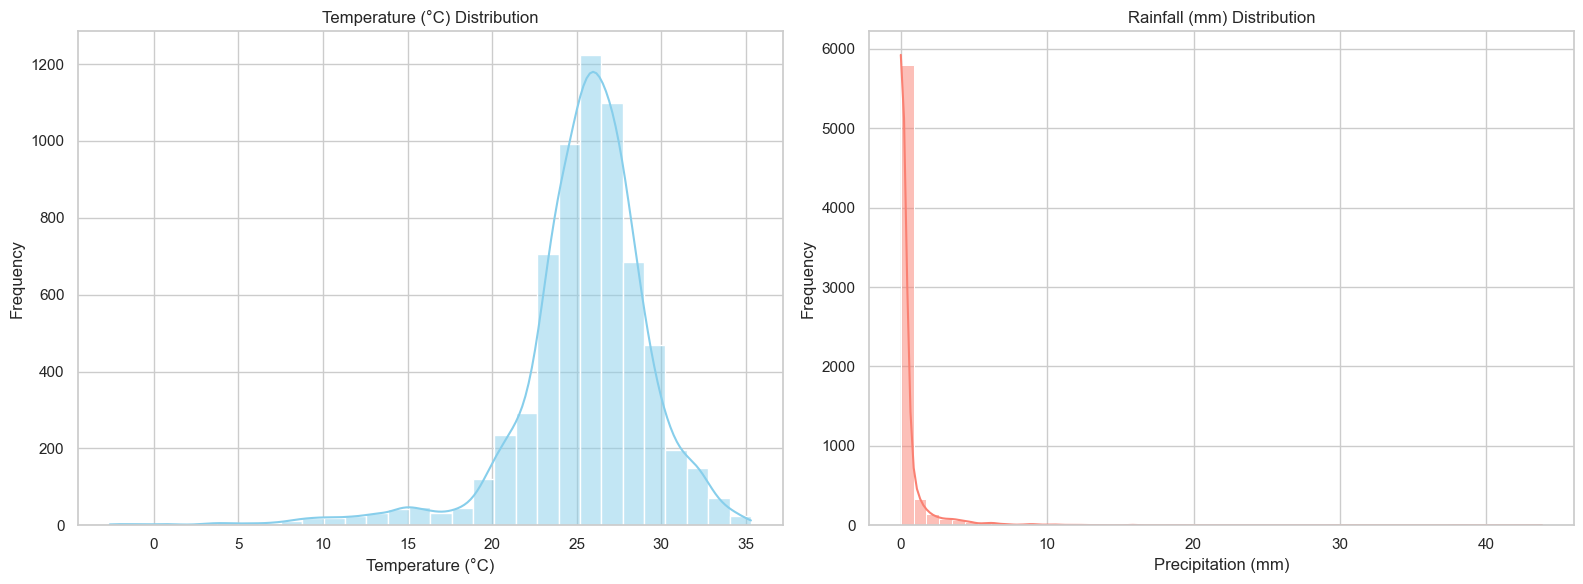

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Create subplots for temperature and rainfall distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Temperature distribution
sns.histplot(df["temperature_celsius"], kde=True, bins=30, ax=axes[0], color="skyblue")
axes[0].set_title("Temperature (°C) Distribution")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Frequency")

# Rainfall (precipitation) distribution
sns.histplot(df["precip_mm"], kde=True, bins=50, ax=axes[1], color="salmon")
axes[1].set_title("Rainfall (mm) Distribution")
axes[1].set_xlabel("Precipitation (mm)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## balancing the data

##### In this phase of the project, we focus on preprocessing and visualizing rainfall data to enhance its suitability for machine learning models. A 

##### logarithmic transformation is applied to the rainfall values using log(precip_mm + 1) to handle the skewness commonly present in precipitation 

##### data, as most values tend to be low with a few extreme outliers. This transformation helps normalize the distribution, ensuring better performance

##### and stability of regression models. Additionally, a binary classification label is created to distinguish between rainy and non-rainy conditions, 

##### where a value of 1 indicates rainfall occurred and 0 indicates no rainfall. This binary feature is particularly useful for classification models 

##### aiming to predict the occurrence of rain. To better understand the transformed data, two visualizations are generated: a histogram of the log-

##### transformed rainfall values to observe the normalized distribution, and a bar chart depicting the balance between rain and no-rain instances in 

##### the dataset. These visualizations provide critical insights into the data distribution and class balance, both of which are essential for guiding 

##### the selection and evaluation of predictive models in the next stages of analysis.



C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


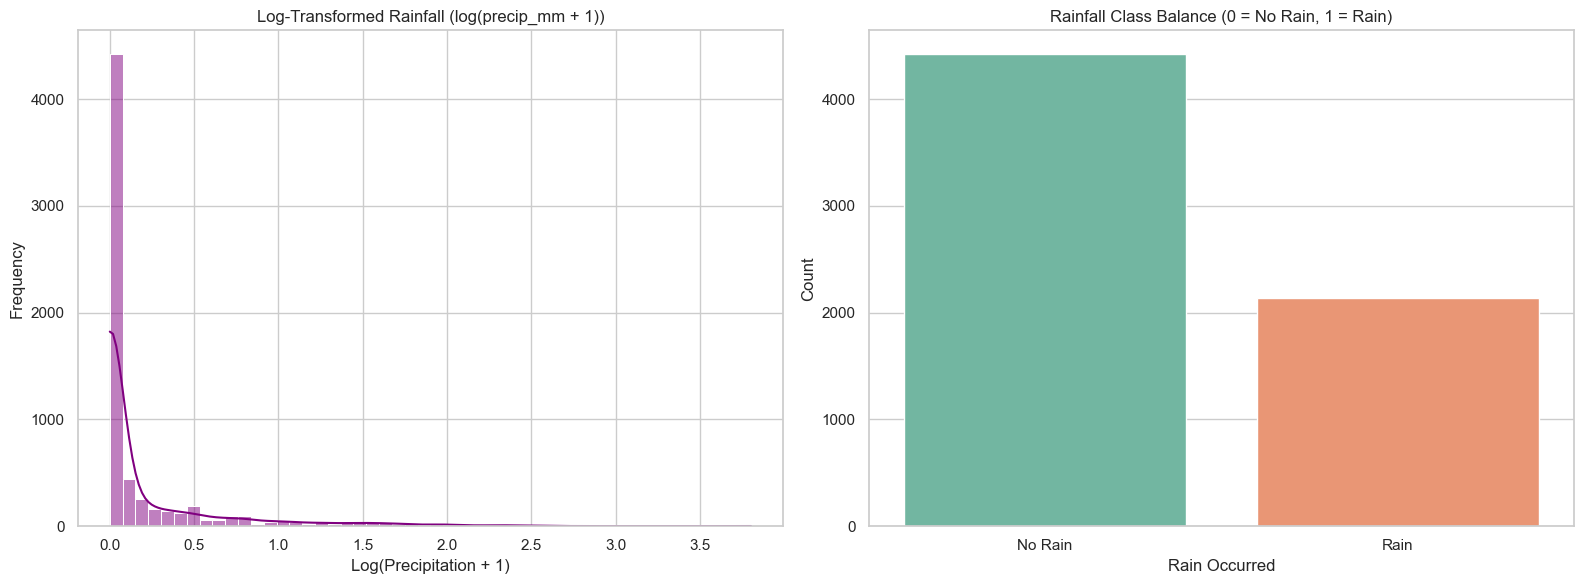

In [18]:
import numpy as np

# 1. Log transformation of rainfall (add 1 to avoid log(0))
df["log_precip_mm"] = np.log1p(df["precip_mm"])

# 2. Convert to binary classification: Rain (1) if precip > 0, else No Rain (0)
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Log-transformed rainfall distribution
sns.histplot(df["log_precip_mm"], kde=True, bins=50, ax=axes[0], color="purple")
axes[0].set_title("Log-Transformed Rainfall (log(precip_mm + 1))")
axes[0].set_xlabel("Log(Precipitation + 1)")
axes[0].set_ylabel("Frequency")

# Binary Rain class balance
sns.countplot(x="rain_occurred", data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Rainfall Class Balance (0 = No Rain, 1 = Rain)")
axes[1].set_xlabel("Rain Occurred")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(["No Rain", "Rain"])

plt.tight_layout()
plt.show()


                              with_log_precip  with_temperature  \
rain_occurred                        0.647479         -0.098226   
cloud                                0.462714         -0.123038   
humidity                             0.391992         -0.368048   
longitude                            0.156288          0.068921   
air_quality_Sulphur_dioxide          0.024860          0.102749   
wind_kph                            -0.009842          0.165314   
air_quality_Nitrogen_dioxide        -0.015632          0.092026   
air_quality_Carbon_Monoxide         -0.025488          0.152635   
feels_like_celsius                  -0.048904          0.975542   
pressure_mb                         -0.089099         -0.425083   
uv_index                            -0.090521          0.437339   
temperature_celsius                 -0.101228               NaN   
air_quality_PM2.5                   -0.139045          0.207734   
air_quality_Ozone                   -0.143719          0.16193

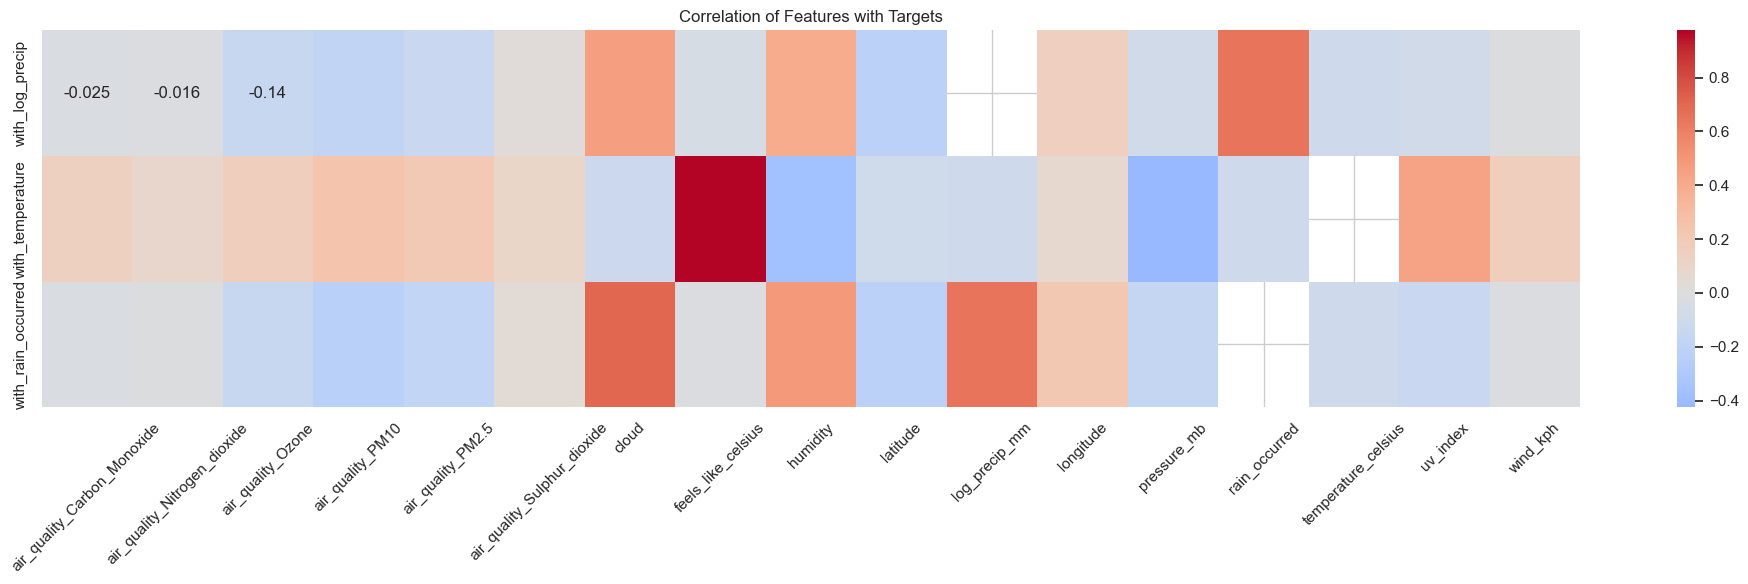

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature list
features = [
    "latitude", "longitude", "humidity", "wind_kph", "cloud", "pressure_mb", "uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

# Targets
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# Create a new DataFrame that includes all features + targets
corr_df = df[features].copy()
corr_df["log_precip_mm"] = y_rainfall
corr_df["temperature_celsius"] = y_temp
corr_df["rain_occurred"] = y_cls

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Extract correlation of features with each target
corr_with_rainfall = corr_matrix["log_precip_mm"].drop("log_precip_mm")
corr_with_temp = corr_matrix["temperature_celsius"].drop("temperature_celsius")
corr_with_cls = corr_matrix["rain_occurred"].drop("rain_occurred")

combined_corr = pd.DataFrame({
    "with_log_precip": corr_with_rainfall,       
    "with_temperature": corr_with_temp,
    "with_rain_occurred": corr_with_cls
})

# Sort and print
print(combined_corr.sort_values(by="with_log_precip", ascending=False))

# Plot
plt.figure(figsize=(20, 6))
sns.heatmap(combined_corr.T, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features with Targets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  random forest model

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer

# -------------------------------------
# Load and preprocess data
# -------------------------------------
# Assuming df is already loaded
# Example: df = pd.read_excel("IndianWeatherRepository.xlsx")

# Drop redundant column if it exists
df = df.drop(columns=['feels_like_fahrenheit'], errors='ignore')

# Log-transform rainfall to reduce skewness
df["log_precip_mm"] = np.log1p(df["precip_mm"])

# Create binary classification column for rain occurrence
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# -------------------------------------
# Define features and targets
# -------------------------------------
features = [
    "latitude","longitude","humidity","wind_kph","cloud","pressure_mb","uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

X = df[features]

# Targets
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# -------------------------------------
# Train-test splits for each task
# -------------------------------------
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(
    X, y_rainfall, test_size=0.2, random_state=42)

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X, y_temp, test_size=0.2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.2, random_state=42)

# -------------------------------------
# Temperature Classification (Cold, Mild, Hot)
# -------------------------------------
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()

X_train_temp_cls, X_test_temp_cls, y_train_temp_cls, y_test_temp_cls = train_test_split(
    X, y_temp_binned, test_size=0.2, random_state=42)

# -------------------------------------
# Compute class weights for rain classification
# -------------------------------------
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_cls), y=y_cls)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_cls), class_weights)}

# -------------------------------------
# Rainfall Regression
# -------------------------------------
rain_regressor = RandomForestRegressor(random_state=42)
rain_regressor.fit(X_train_rain, y_train_rain)

y_pred_rain_log = rain_regressor.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)

rainfall_mse = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 Rainfall Regression MSE:", rainfall_mse)

# -------------------------------------
# Temperature Regression
# -------------------------------------
temp_regressor = RandomForestRegressor(random_state=42)
temp_regressor.fit(X_train_temp, y_train_temp)

y_pred_temp = temp_regressor.predict(X_test_temp)
temp_mse = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ Temperature Regression MSE:", temp_mse)

# -------------------------------------
# Rain Occurrence Classification
# -------------------------------------
classifier = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
classifier.fit(X_train_cls, y_train_cls)

y_pred_cls = classifier.predict(X_test_cls)

print("\n✅ Rain Occurrence Classification Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ Rain Occurrence Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ Rain Occurrence Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Classification (Binned)
# -------------------------------------
temp_classifier = RandomForestClassifier(random_state=42)
temp_classifier.fit(X_train_temp_cls, y_train_temp_cls)

y_pred_temp_cls = temp_classifier.predict(X_test_temp_cls)

print("\n✅ Temperature Classification Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n✅ Temperature Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("✅ Temperature Classification Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


📉 Rainfall Regression MSE: 3.947567590734617
🌡️ Temperature Regression MSE: 0.05367120487433358

✅ Rain Occurrence Classification Confusion Matrix:
[[821  64]
 [ 43 385]]

✅ Rain Occurrence Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       885
           1       0.86      0.90      0.88       428

    accuracy                           0.92      1313
   macro avg       0.90      0.91      0.91      1313
weighted avg       0.92      0.92      0.92      1313

✅ Rain Occurrence Classification Accuracy: 0.9185072353389185

✅ Temperature Classification Confusion Matrix:
[[416  11   0]
 [  5 384  13]
 [  0  10 474]]

✅ Temperature Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       427
           1       0.95      0.96      0.95       402
           2       0.97      0.98      0.98       484

    accuracy                           0.97     

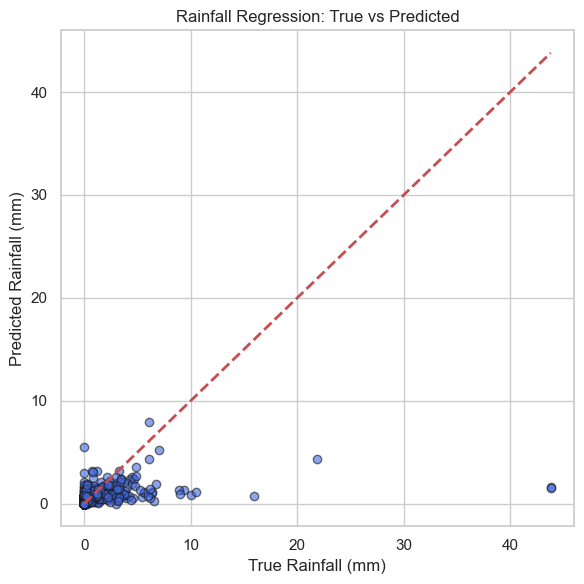

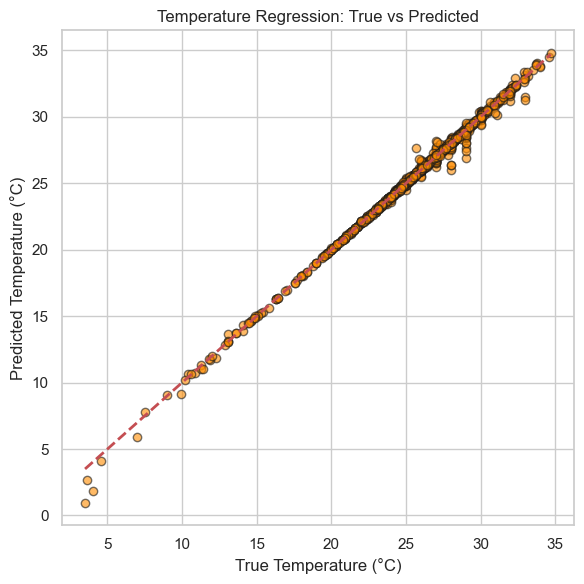

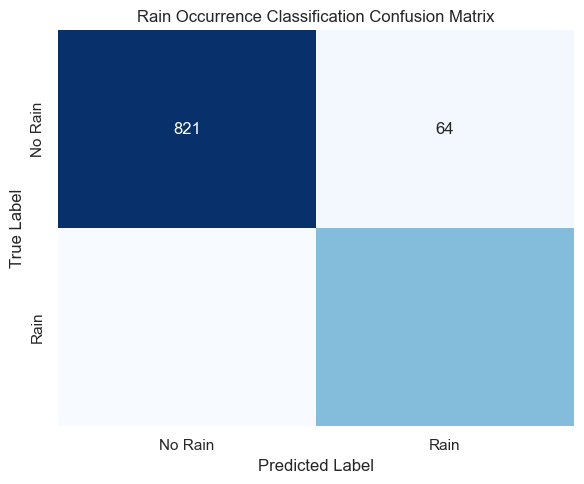

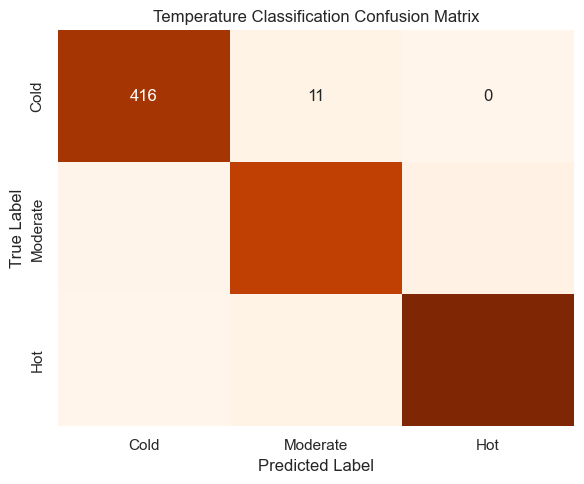

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure these predictions have already been made:
# y_pred_rain_mm, y_test_rain_mm
# y_pred_temp, y_test_temp
# y_pred_cls, y_test_cls
# y_pred_temp_cls, y_test_temp_cls

# --- Compute Confusion Matrices for Classification ---
cm_cls = confusion_matrix(y_test_cls, y_pred_cls)
cm_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cls, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Rain Occurrence Classification Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_temp_cls, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Temperature Classification Confusion Matrix')
plt.tight_layout()
plt.show()


## xgboost

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer
import xgboost as xgb

# -------------------------------------
# Load and preprocess data
# -------------------------------------
# df = pd.read_excel("IndianWeatherRepository.xlsx")  # Load your dataset

df = df.drop(columns=['feels_like_fahrenheit'], errors='ignore')
df["log_precip_mm"] = np.log1p(df["precip_mm"])
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# -------------------------------------
# Define features and targets
# -------------------------------------
features = [
    "latitude","longitude","humidity","wind_kph","cloud","pressure_mb","uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

X = df[features]
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# -------------------------------------
# Train-test splits
# -------------------------------------
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X, y_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# -------------------------------------
# Temperature Classification Binning
# -------------------------------------
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()
X_train_temp_cls, X_test_temp_cls, y_train_temp_cls, y_test_temp_cls = train_test_split(X, y_temp_binned, test_size=0.2, random_state=42)

# -------------------------------------
# Compute class weights for classification
# -------------------------------------
class_weights_rain = compute_class_weight('balanced', classes=np.unique(y_cls), y=y_cls)
class_weight_dict_rain = {cls: weight for cls, weight in zip(np.unique(y_cls), class_weights_rain)}

class_weights_temp = compute_class_weight('balanced', classes=np.unique(y_temp_binned), y=y_temp_binned)
class_weight_dict_temp = {cls: weight for cls, weight in zip(np.unique(y_temp_binned), class_weights_temp)}

# -------------------------------------
# Rainfall Regression - XGBoost
# -------------------------------------
xgb_reg_rain = xgb.XGBRegressor(n_jobs=-1, random_state=42)
xgb_reg_rain.fit(X_train_rain, y_train_rain)

y_pred_rain_log = xgb_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 XGBoost Rainfall Regression MSE:", mse_rain)

# -------------------------------------
# Temperature Regression - XGBoost
# -------------------------------------
xgb_reg_temp = xgb.XGBRegressor(n_jobs=-1, random_state=42)
xgb_reg_temp.fit(X_train_temp, y_train_temp)

y_pred_temp = xgb_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ XGBoost Temperature Regression MSE:", mse_temp)

# -------------------------------------
# Rain Classification - XGBoost
# -------------------------------------
xgb_cls_rain = xgb.XGBClassifier(n_jobs=-1, random_state=42, scale_pos_weight=class_weight_dict_rain.get(1, 1))
xgb_cls_rain.fit(X_train_cls, y_train_cls)

y_pred_cls = xgb_cls_rain.predict(X_test_cls)
print("\n✅ XGBoost Rain Classification Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ XGBoost Rain Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ XGBoost Rain Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Class Classification - XGBoost
# -------------------------------------
# Convert class weights into sample weights for multi-class
sample_weights_temp = np.array([class_weight_dict_temp[y] for y in y_train_temp_cls])
xgb_cls_temp = xgb.XGBClassifier(n_jobs=-1, random_state=42)
xgb_cls_temp.fit(X_train_temp_cls, y_train_temp_cls, sample_weight=sample_weights_temp)

y_pred_temp_cls = xgb_cls_temp.predict(X_test_temp_cls)
print("\n🔥 XGBoost Temperature Class Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n🔥 XGBoost Temperature Class Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("🔥 XGBoost Temperature Classification Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


📉 XGBoost Rainfall Regression MSE: 3.9308996420990088
🌡️ XGBoost Temperature Regression MSE: 0.0503158405458963

✅ XGBoost Rain Classification Confusion Matrix:
[[815  70]
 [ 34 394]]

✅ XGBoost Rain Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       885
           1       0.85      0.92      0.88       428

    accuracy                           0.92      1313
   macro avg       0.90      0.92      0.91      1313
weighted avg       0.92      0.92      0.92      1313

✅ XGBoost Rain Classification Accuracy: 0.9207920792079208

🔥 XGBoost Temperature Class Confusion Matrix:
[[421   6   0]
 [  2 387  13]
 [  0   9 475]]

🔥 XGBoost Temperature Class Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       427
           1       0.96      0.96      0.96       402
           2       0.97      0.98      0.98       484

    accuracy                           0.98

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2703780404.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2703780404.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


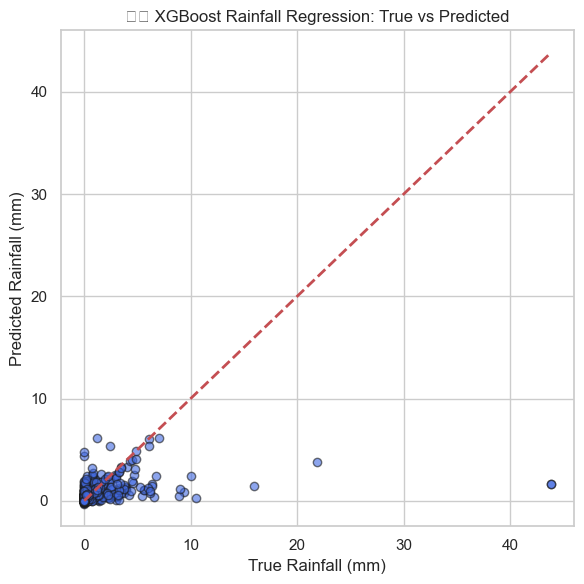

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2703780404.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2703780404.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


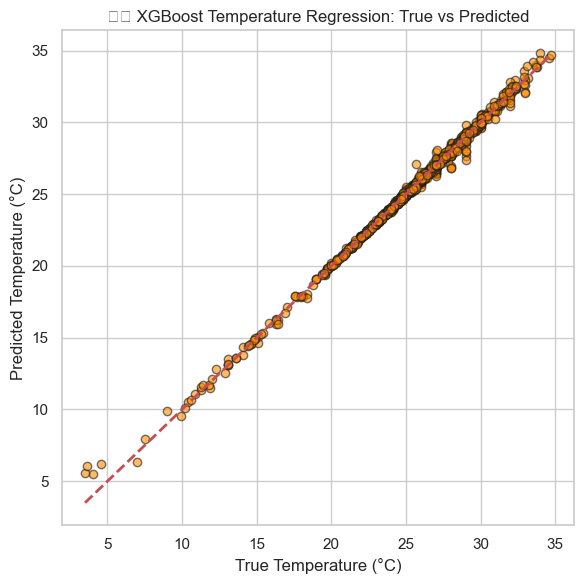

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2703780404.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


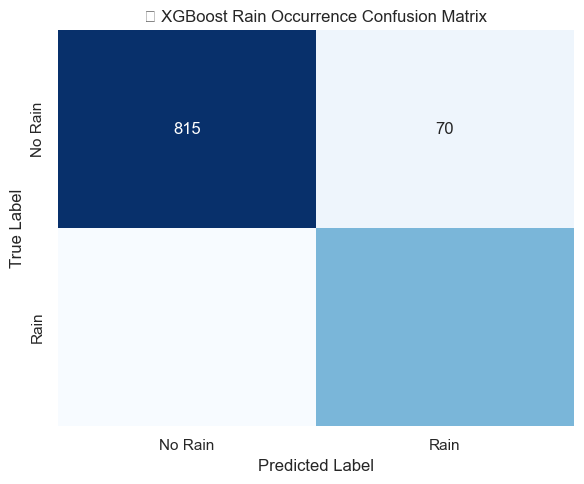

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2703780404.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


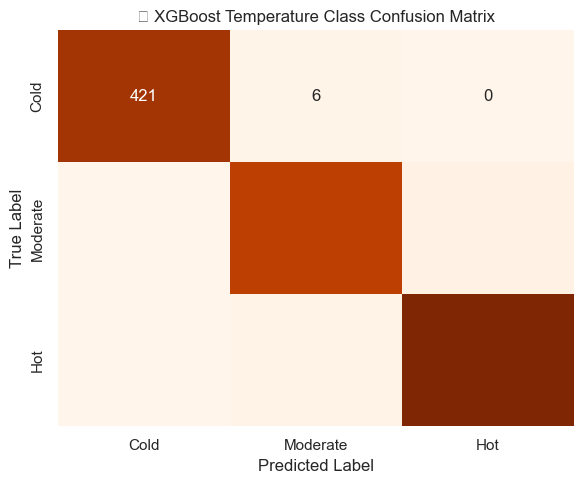

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Compute Confusion Matrices for Classification ---
cm_xgb_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_xgb_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature class

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ XGBoost Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ XGBoost Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_cls, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ XGBoost Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_temp_cls, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 XGBoost Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


## lightgbm

In [28]:
import lightgbm as lgb

# -------------------------------------
# Rainfall Regression - LightGBM
# -------------------------------------
lgb_reg_rain = lgb.LGBMRegressor(n_jobs=-1, random_state=42)
lgb_reg_rain.fit(X_train_rain, y_train_rain)

y_pred_rain_log = lgb_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 LightGBM Rainfall Regression MSE:", mse_rain)

# -------------------------------------
# Temperature Regression - LightGBM
# -------------------------------------
lgb_reg_temp = lgb.LGBMRegressor(n_jobs=-1, random_state=42)
lgb_reg_temp.fit(X_train_temp, y_train_temp)

y_pred_temp = lgb_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ LightGBM Temperature Regression MSE:", mse_temp)

# -------------------------------------
# Rain Occurrence Classification - LightGBM
# -------------------------------------
lgb_cls_rain = lgb.LGBMClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_rain)
lgb_cls_rain.fit(X_train_cls, y_train_cls)

y_pred_cls = lgb_cls_rain.predict(X_test_cls)

print("\n✅ LightGBM Rain Occurrence Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ LightGBM Rain Occurrence Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ LightGBM Rain Occurrence Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Classification (Binned) - LightGBM
# -------------------------------------
lgb_cls_temp = lgb.LGBMClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_temp)
lgb_cls_temp.fit(X_train_temp_cls, y_train_temp_cls)

y_pred_temp_cls = lgb_cls_temp.predict(X_test_temp_cls)

print("\n✅ LightGBM Temperature Class Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n✅ LightGBM Temperature Class Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("✅ LightGBM Temperature Class Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2418
[LightGBM] [Info] Number of data points in the train set: 5249, number of used features: 14
[LightGBM] [Info] Start training from score 0.201424
📉 LightGBM Rainfall Regression MSE: 4.104260941767638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2418
[LightGBM] [Info] Number of data points in the train set: 5249, number of used features: 14
[LightGBM] [Info] Start training from score 25.440655
🌡️ LightGBM Temperature Regression MSE: 0.05117814696866953
[LightGBM] [Info] Number of positive: 1710, number of negative: 3539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=tr

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2774175349.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2774175349.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


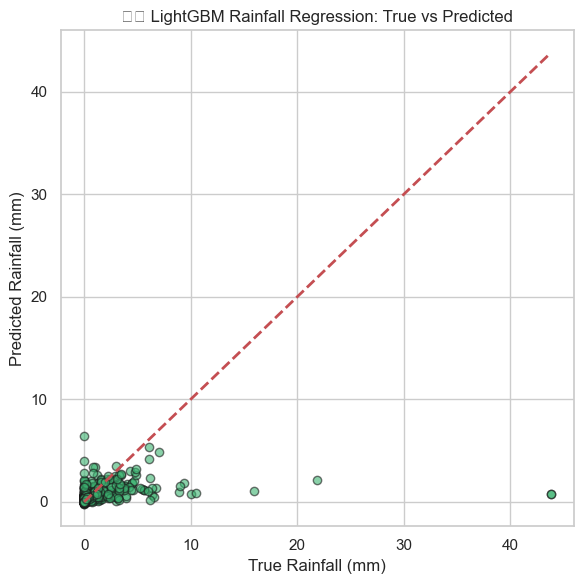

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2774175349.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2774175349.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


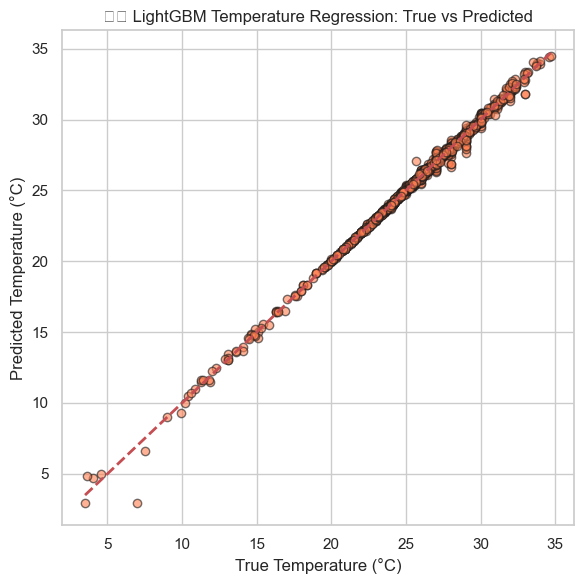

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2774175349.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


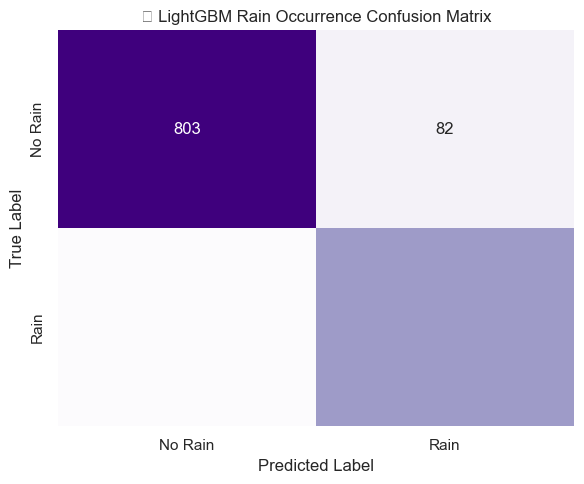

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2774175349.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


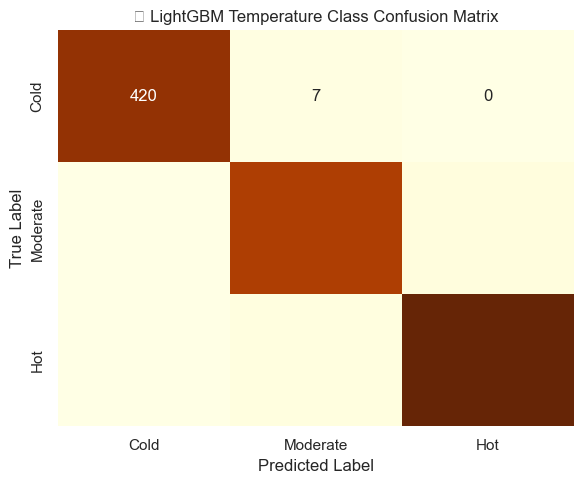

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrices ---
cm_lgb_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_lgb_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature class

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='mediumseagreen', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ LightGBM Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='coral', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ LightGBM Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb_cls, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ LightGBM Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb_temp_cls, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 LightGBM Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


## ExtraTreesClassifier

In [30]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

# -------------------------------------
# Rainfall Regression - ExtraTrees
# -------------------------------------
et_reg_rain = ExtraTreesRegressor(n_jobs=-1, random_state=42)
et_reg_rain.fit(X_train_rain, y_train_rain)

y_pred_rain_log = et_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 ExtraTrees Rainfall Regression MSE:", mse_rain)

# -------------------------------------
# Temperature Regression - ExtraTrees
# -------------------------------------
et_reg_temp = ExtraTreesRegressor(n_jobs=-1, random_state=42)
et_reg_temp.fit(X_train_temp, y_train_temp)

y_pred_temp = et_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ ExtraTrees Temperature Regression MSE:", mse_temp)

# -------------------------------------
# Rain Classification - ExtraTrees
# -------------------------------------
et_cls_rain = ExtraTreesClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_rain)
et_cls_rain.fit(X_train_cls, y_train_cls)

y_pred_cls = et_cls_rain.predict(X_test_cls)

print("\n✅ ExtraTrees Rain Classification Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ ExtraTrees Rain Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ ExtraTrees Rain Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Class Classification - ExtraTrees
# -------------------------------------
et_cls_temp = ExtraTreesClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_temp)
et_cls_temp.fit(X_train_temp_cls, y_train_temp_cls)

y_pred_temp_cls = et_cls_temp.predict(X_test_temp_cls)

print("\n✅ ExtraTrees Temperature Class Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n✅ ExtraTrees Temperature Class Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("✅ ExtraTrees Temperature Class Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


📉 ExtraTrees Rainfall Regression MSE: 3.6023862191114606
🌡️ ExtraTrees Temperature Regression MSE: 0.027145897182025848

✅ ExtraTrees Rain Classification Confusion Matrix:
[[826  59]
 [ 33 395]]

✅ ExtraTrees Rain Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       885
           1       0.87      0.92      0.90       428

    accuracy                           0.93      1313
   macro avg       0.92      0.93      0.92      1313
weighted avg       0.93      0.93      0.93      1313

✅ ExtraTrees Rain Classification Accuracy: 0.9299314546839299

✅ ExtraTrees Temperature Class Confusion Matrix:
[[417  10   0]
 [  8 378  16]
 [  0  16 468]]

✅ ExtraTrees Temperature Class Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       427
           1       0.94      0.94      0.94       402
           2       0.97      0.97      0.97       484

    a

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2223355449.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2223355449.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


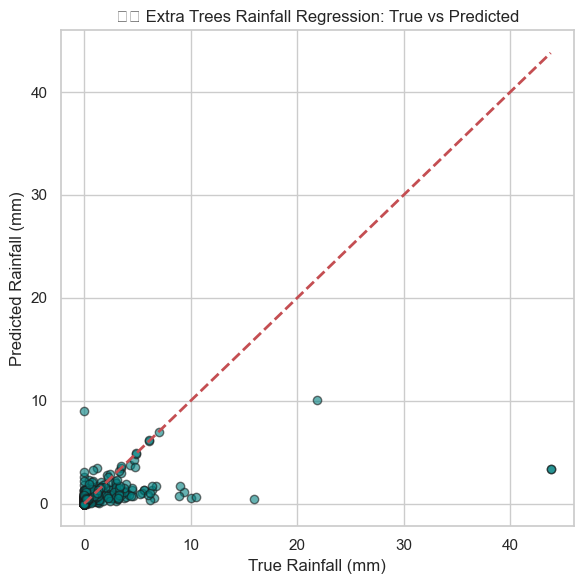

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2223355449.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2223355449.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


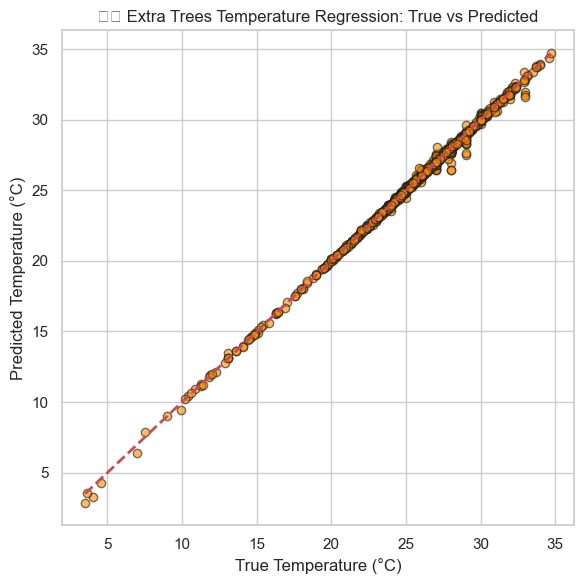

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2223355449.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


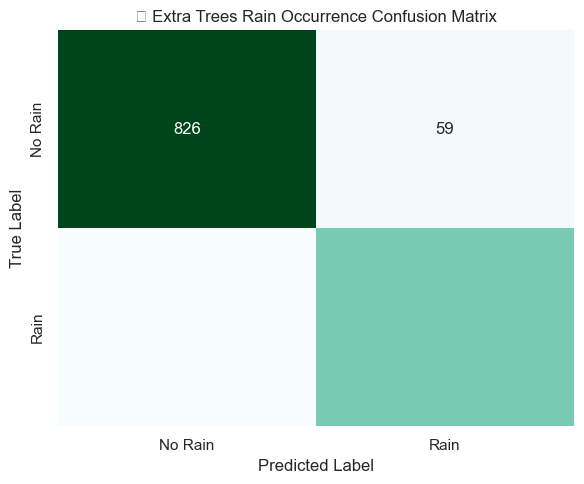

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\2223355449.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


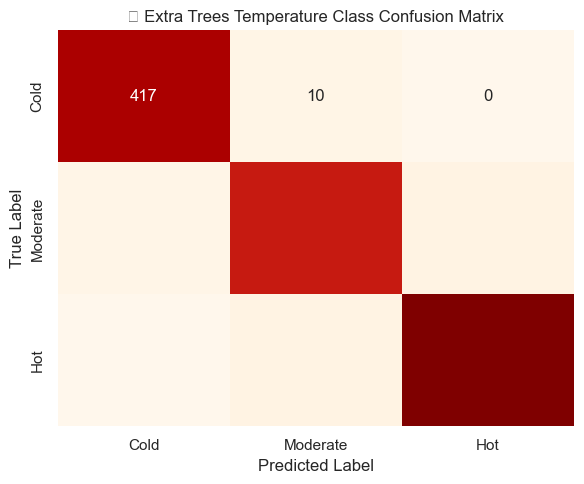

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrices ---
cm_etc_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_etc_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature classes

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='teal', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ Extra Trees Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ Extra Trees Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_etc_cls, annot=True, fmt='d', cmap='BuGn', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ Extra Trees Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_etc_temp_cls, annot=True, fmt='d', cmap='OrRd', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 Extra Trees Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


## SVM

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.svm import SVR, SVC

# -----------------------------
# Load and preprocess data
# -----------------------------
# df = pd.read_excel("IndianWeatherRepository.xlsx")  # Uncomment if needed

df = df.drop(columns=['feels_like_fahrenheit'], errors='ignore')
df["log_precip_mm"] = np.log1p(df["precip_mm"])
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# Features
features = [
    "latitude","longitude","humidity","wind_kph","cloud","pressure_mb","uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

X = df[features]
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test splits
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X_scaled, y_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_scaled, y_temp, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_cls, test_size=0.2, random_state=42)

# Binning temperature
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()

X_train_temp_cls, X_test_temp_cls, y_train_temp_cls, y_test_temp_cls = train_test_split(X_scaled, y_temp_binned, test_size=0.2, random_state=42)

# Compute class weights
class_weights_rain = compute_class_weight('balanced', classes=np.unique(y_cls), y=y_cls)
class_weight_dict_rain = {cls: weight for cls, weight in zip(np.unique(y_cls), class_weights_rain)}

class_weights_temp = compute_class_weight('balanced', classes=np.unique(y_temp_binned), y=y_temp_binned)
class_weight_dict_temp = {cls: weight for cls, weight in zip(np.unique(y_temp_binned), class_weights_temp)}

# -----------------------------
# Rainfall Regression
# -----------------------------
svm_reg_rain = SVR(kernel='rbf')
svm_reg_rain.fit(X_train_rain, y_train_rain)
y_pred_rain_log = svm_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("🌧️ SVM Rainfall Regression MSE:", mse_rain)

# -----------------------------
# Temperature Regression
# -----------------------------
svm_reg_temp = SVR(kernel='rbf')
svm_reg_temp.fit(X_train_temp, y_train_temp)
y_pred_temp = svm_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ SVM Temperature Regression MSE:", mse_temp)

# -----------------------------
# Rain Occurrence Classification
# -----------------------------
svm_cls_rain = SVC(kernel='rbf', class_weight=class_weight_dict_rain)
svm_cls_rain.fit(X_train_cls, y_train_cls)
y_pred_cls = svm_cls_rain.predict(X_test_cls)

print("\n✅ SVM Rain Occurrence Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -----------------------------
# Temperature Classification
# -----------------------------
svm_temp_cls = SVC(kernel='rbf', class_weight=class_weight_dict_temp)
svm_temp_cls.fit(X_train_temp_cls, y_train_temp_cls)
y_pred_temp_cls = svm_temp_cls.predict(X_test_temp_cls)

print("\n🔥 SVM Temperature Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))
print("Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


🌧️ SVM Rainfall Regression MSE: 4.3787059812228755
🌡️ SVM Temperature Regression MSE: 0.3483854618540015

✅ SVM Rain Occurrence Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90       885
           1       0.73      0.97      0.83       428

    accuracy                           0.87      1313
   macro avg       0.86      0.90      0.87      1313
weighted avg       0.90      0.87      0.88      1313

Accuracy: 0.8728103579588729

🔥 SVM Temperature Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       427
           1       0.85      0.92      0.88       402
           2       0.95      0.92      0.94       484

    accuracy                           0.93      1313
   macro avg       0.93      0.93      0.93      1313
weighted avg       0.93      0.93      0.93      1313

Accuracy: 0.9261233815689262


C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\1632393956.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\1632393956.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


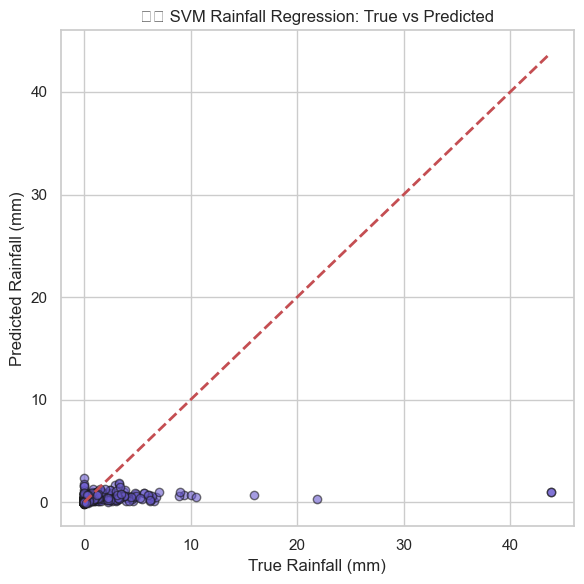

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\1632393956.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\1632393956.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


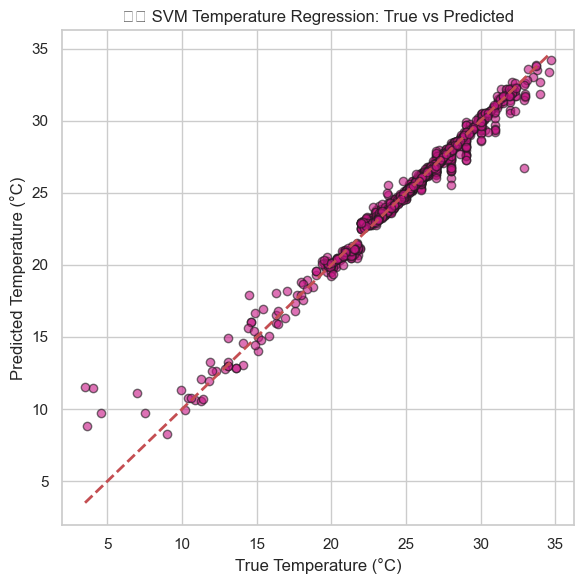

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\1632393956.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


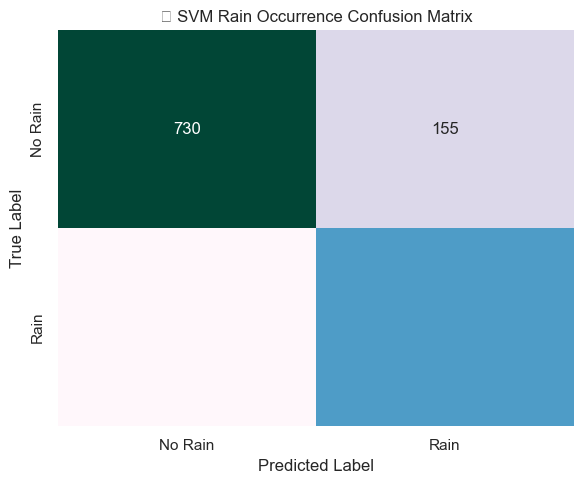

C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_18052\1632393956.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


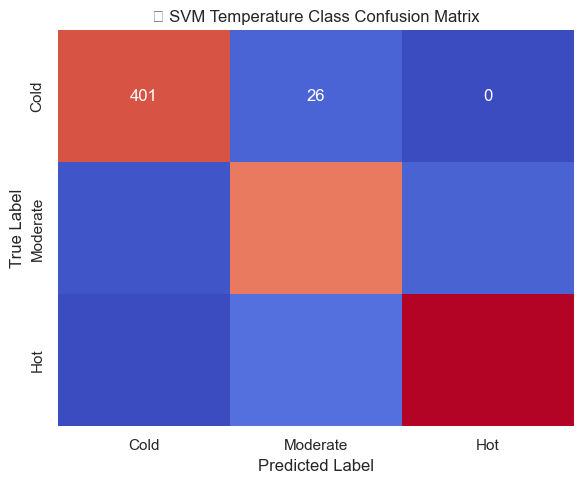

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrices ---
cm_svm_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_svm_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature classes

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='slateblue', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ SVM Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='mediumvioletred', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ SVM Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_cls, annot=True, fmt='d', cmap='PuBuGn', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ SVM Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_temp_cls, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 SVM Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_7176\732267240.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_7176\732267240.py:27: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\AppData\Local\Temp\ipykernel_7176\732267240.py:27: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\VARSHINI.J\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER

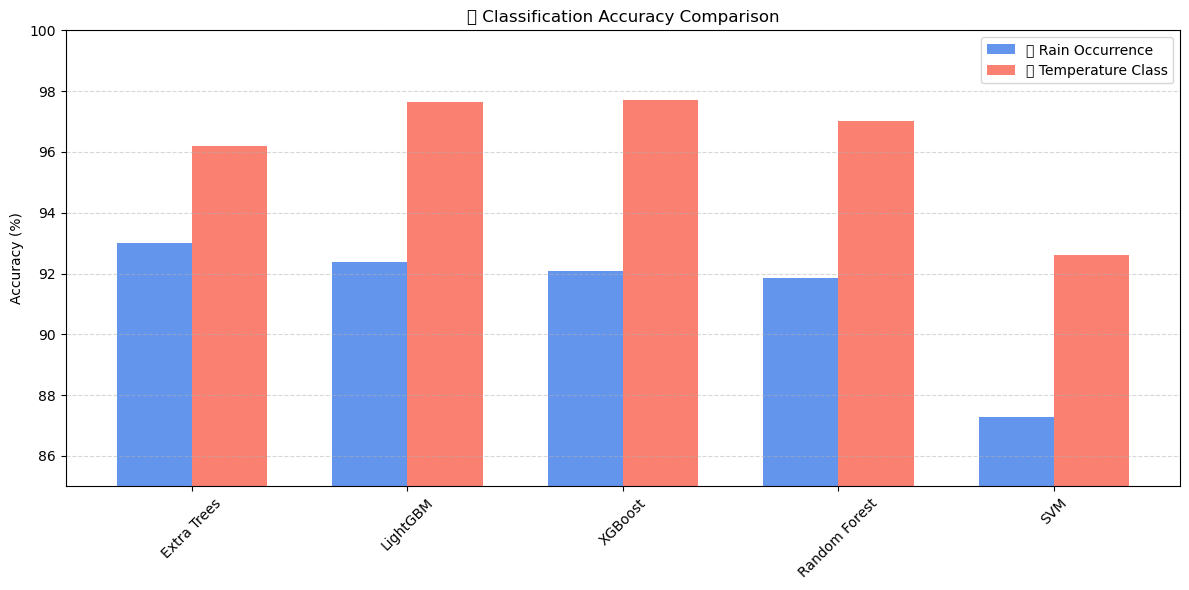

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Extra Trees', 'LightGBM', 'XGBoost', 'Random Forest', 'SVM']
rain_accuracies = [92.99, 92.38, 92.08, 91.85, 87.28]
temp_accuracies = [96.19, 97.64, 97.72, 97.03, 92.61]

# Setup
x = np.arange(len(models))
width = 0.35  # Bar width

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rain_accuracies, width, label='🌧️ Rain Occurrence', color='cornflowerblue')
plt.bar(x + width/2, temp_accuracies, width, label='🌡️ Temperature Class', color='salmon')

# Styling
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy (%)')
plt.ylim(85, 100)
plt.title('📊 Classification Accuracy Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


In [39]:
import joblib

# Save models
joblib.dump(et_reg_rain, "et_reg_rain.pkl")
joblib.dump(et_reg_temp, "et_reg_temp.pkl")
joblib.dump(et_cls_rain, "et_cls_rain.pkl")
joblib.dump(et_cls_temp, "et_cls_temp.pkl")

['et_cls_temp.pkl']